In [6]:
import pandas as pd

# show the current path
import os
print(os.getcwd())

df = pd.read_csv('tor_neighborhood_condorental.csv')
df


/home/kayaba_attribution/Documents/coding/Hackathons/condo-cost-predictor/data


,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,CLASSIFICATION,CLASSIFICATION_CODE,...,THEFTOVER_RATE_2024,POPULATION_2024,geometry_wkt_1,geometry_type_1,total_stop_count,avg_stop_frequency,max_stop_frequency,total_line_length_meters,transit_line_density,distinct_route_count
0,78,2502289,26022804,NaN,110,110,Keelesdale-Eglinton West,Keelesdale-Eglinton West (110),Neighbourhood Improvement Area,NIA,...,32.430679,12334,MULTIPOLYGON (((-79.4620997164555 43.685726152...,MultiPolygon,30,537.266667,1321,1.018065,1.017866,11
1,112,2502255,26022770,NaN,41,41,Bridle Path-Sunnybrook-York Mills,Bridle Path-Sunnybrook-York Mills (41),Not an NIA or Emerging Neighbourhood,NaN,...,65.914146,12137,MULTIPOLYGON (((-79.3783787433035 43.744300475...,MultiPolygon,73,265.602740,911,1.247435,1.246204,14
2,37,2502330,26022845,NaN,122,122,Birchcliffe-Cliffside,Birchcliffe-Cliffside (122),Not an NIA or Emerging Neighbourhood,NaN,...,23.522032,25508,MULTIPOLYGON (((-79.2467178095752 43.698988552...,MultiPolygon,101,282.693069,790,1.291023,1.290157,13
3,120,2502247,26022762,NaN,33,33,Clanton Park,Clanton Park (33),Not an NIA or Emerging Neighbourhood,NaN,...,76.310394,20967,MULTIPOLYGON (((-79.436951392653 43.7491295413...,MultiPolygon,63,404.031746,1541,2.894569,2.893222,19
4,2,2502365,26022880,NaN,173,173,North Toronto,North Toronto (173),Not an NIA or Emerging Neighbourhood,NaN,...,30.109901,19927,MULTIPOLYGON (((-79.3974398976879 43.706938508...,MultiPolygon,9,532.888889,1692,0.085268,0.085265,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,69,2502298,26022813,NaN,120,120,Clairlea-Birchmount,Clairlea-Birchmount (120),Not an NIA or Emerging Neighbourhood,NaN,...,29.592607,30413,MULTIPOLYGON (((-79.2760341563959 43.725367443...,MultiPolygon,123,363.121951,1429,2.844410,2.842062,24
154,36,2502331,26022846,NaN,123,123,Cliffcrest,Cliffcrest (123),Not an NIA or Emerging Neighbourhood,NaN,...,71.096527,18285,MULTIPOLYGON (((-79.217765224749 43.7278614783...,MultiPolygon,63,385.269841,961,1.054368,1.053521,13
155,31,2502336,26022851,NaN,129,129,Agincourt North,Agincourt North (129),Not an NIA or Emerging Neighbourhood,NaN,...,36.153290,30426,MULTIPOLYGON (((-79.2577172418514 43.809930570...,MultiPolygon,81,289.345679,807,1.755272,1.753847,10
156,49,2502318,26022833,NaN,157,157,Bendale South,Bendale South (157),Not an NIA or Emerging Neighbourhood,NaN,...,17.277124,11576,MULTIPOLYGON (((-79.2431497973864 43.755786982...,MultiPolygon,30,320.533333,681,0.734897,0.734688,16


In [8]:
for col in df.columns:
    print(col)



_id
AREA_ID
AREA_ATTR_ID
PARENT_AREA_ID
AREA_SHORT_CODE
AREA_LONG_CODE
AREA_NAME
AREA_DESC
CLASSIFICATION
CLASSIFICATION_CODE
OBJECTID
geometry_wkt
geometry_type
Region_classif
Area
Bachelor Leased
bachelor_avg_lease_rate
1_bedrooms_leased
1_bed_room_avg_lease_rate
2_bedrooms_leased
2_bedrooms_avg_lease_rate
3_bedrooms_leased
3_bedrooms_avg_lease_rate
area_sq_meters
perimeter_meters
park_count
AREA_NAME_1
ASSAULT_2014
ASSAULT_2015
ASSAULT_2016
ASSAULT_2017
ASSAULT_2018
ASSAULT_2019
ASSAULT_2020
ASSAULT_2021
ASSAULT_2022
ASSAULT_2023
ASSAULT_2024
ASSAULT_RATE_2014
ASSAULT_RATE_2015
ASSAULT_RATE_2016
ASSAULT_RATE_2017
ASSAULT_RATE_2018
ASSAULT_RATE_2019
ASSAULT_RATE_2020
ASSAULT_RATE_2021
ASSAULT_RATE_2022
ASSAULT_RATE_2023
ASSAULT_RATE_2024
AUTOTHEFT_2014
AUTOTHEFT_2015
AUTOTHEFT_2016
AUTOTHEFT_2017
AUTOTHEFT_2018
AUTOTHEFT_2019
AUTOTHEFT_2020
AUTOTHEFT_2021
AUTOTHEFT_2022
AUTOTHEFT_2023
AUTOTHEFT_2024
AUTOTHEFT_RATE_2014
AUTOTHEFT_RATE_2015
AUTOTHEFT_RATE_2016
AUTOTHEFT_RATE_2017
AUTOT

# Model Strategy for 158 Neighborhoods

## Target Variable Selection
We have 4 potential targets (all rental rates):
- `bachelor_avg_lease_rate`
- `1_bed_room_avg_lease_rate` ← **START HERE** (most common rental type)
- `2_bedrooms_avg_lease_rate`
- `3_bedrooms_avg_lease_rate`

**Strategy**: Start with `1_bed_room_avg_lease_rate` as it likely has the most complete data.

## Features vs Target
- **Features**: All columns EXCEPT the 4 lease rate columns
- **Target**: ONE lease rate column (we'll use 1-bedroom)

## Model Recommendations for 158 Samples
1. **Random Forest** (baseline) - Less prone to overfitting
2. **XGBoost** (if RF works well) - Better performance, needs tuning

## Stratification Strategy
For regression with small samples:
- Stratify by `Region_classif` to ensure train/test have proportional regional representation
- Use 80/20 or 75/25 split (not too small test set)
- Use K-Fold Cross-Validation (k=5 or k=10) for robust evaluation


In [10]:
# Step 1: Check data quality for target variable
print("=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)

# Check missing values in all lease rate columns
lease_cols = ['bachelor_avg_lease_rate', '1_bed_room_avg_lease_rate', 
              '2_bedrooms_avg_lease_rate', '3_bedrooms_avg_lease_rate']

for col in lease_cols:
    missing = (df[col] == 0).sum()
    valid = (df[col] > 0).sum()
    print(f"\n{col}:")
    print(f"  Valid entries: {valid}/{len(df)} ({valid/len(df)*100:.1f}%)")
    print(f"  Missing (0s): {missing}")
    if valid > 0:
        print(f"  Range: ${df[df[col] > 0][col].min():.0f} - ${df[df[col] > 0][col].max():.0f}")
        print(f"  Mean: ${df[df[col] > 0][col].mean():.0f}")

# Check Region_classif distribution (for stratification)
print("\n" + "=" * 60)
print("REGION DISTRIBUTION (for stratification)")
print("=" * 60)
print(df['Region_classif'].value_counts())

# Check for any nulls in features
print("\n" + "=" * 60)
print("MISSING VALUES IN FEATURES")
print("=" * 60)
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
if len(null_counts) > 0:
    print(null_counts)
else:
    print("No null values found!")


TARGET VARIABLE ANALYSIS

bachelor_avg_lease_rate:
  Valid entries: 115/158 (72.8%)
  Missing (0s): 43
  Range: $1666 - $2088
  Mean: $1858

1_bed_room_avg_lease_rate:
  Valid entries: 158/158 (100.0%)
  Missing (0s): 0
  Range: $2000 - $2770
  Mean: $2290

2_bedrooms_avg_lease_rate:
  Valid entries: 158/158 (100.0%)
  Missing (0s): 0
  Range: $2513 - $4885
  Mean: $3005

3_bedrooms_avg_lease_rate:
  Valid entries: 136/158 (86.1%)
  Missing (0s): 22
  Range: $1890 - $5790
  Mean: $3723

REGION DISTRIBUTION (for stratification)
Region_classif
Toronto C08    11
Toronto W05     9
Toronto W04     9
Toronto E03     8
Toronto W08     8
Toronto W03     6
Toronto C15     6
Toronto W02     6
Toronto C01     6
Toronto C04     6
Toronto W10     5
Toronto E09     5
Toronto E04     5
Toronto E05     5
Toronto W06     5
Toronto E11     4
Toronto C02     4
Toronto W01     4
Toronto C13     4
Toronto E02     4
Toronto E08     4
Toronto C03     3
Toronto E01     3
Toronto E07     3
Toronto E10     3
To

In [11]:
# Step 2: Prepare data for modeling

# Remove rows where target is 0 (missing data)
target_col = '1_bed_room_avg_lease_rate'
df_model = df[df[target_col] > 0].copy()

print(f"Dataset after removing missing targets: {len(df_model)} neighborhoods")

# Separate features and target
# Remove ALL lease rate columns from features (they are targets, not predictors)
feature_cols = [col for col in df_model.columns 
                if col not in lease_cols and col != 'AREA_NAME']

X = df_model[feature_cols].copy()
y = df_model[target_col].copy()

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns ({len(feature_cols)}):")
for col in feature_cols:
    print(f"  - {col}")


Dataset after removing missing targets: 158 neighborhoods

Features shape: (158, 16)
Target shape: (158,)

Feature columns (16):
  - Region_classif
  - area_sq_meters
  - park_count
  - POPULATION_2024
  - total_stop_count
  - avg_stop_frequency
  - transit_line_density
  - distinct_route_count
  - total_line_length_meters
  - ASSAULT_RATE_2024
  - AUTOTHEFT_RATE_2024
  - BIKETHEFT_RATE_2024
  - THEFTFROMMV_RATE_2024
  - THEFTOVER_RATE_2024
  - ASSAULT_RATE_2023
  - AUTOTHEFT_RATE_2023


In [15]:
# Step 3: Handle categorical and missing values

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Handle Region_classif (categorical) - encode it
X['Region_classif_encoded'] = LabelEncoder().fit_transform(X['Region_classif'])

# Drop the original Region_classif since we encoded it
X_processed = X.drop('Region_classif', axis=1)

# Handle any remaining nulls by filling with median
null_cols = X_processed.columns[X_processed.isnull().any()].tolist()
if null_cols:
    print(f"Filling nulls in: {null_cols}")
    for col in null_cols:
        X_processed[col].fillna(X_processed[col].median(), inplace=True)

# Train/test split with stratification by region
# We'll use the original Region_classif from df_model for stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, 
    y, 
    test_size=0.2,  # 80/20 split
    random_state=42,
    # stratify=df_model['Region_classif']  # Stratify by region
)

print(f"\nTrain set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")
print(f"\nTarget variable statistics:")
print(f"  Train - Mean: ${y_train.mean():.0f}, Std: ${y_train.std():.0f}")
print(f"  Test  - Mean: ${y_test.mean():.0f}, Std: ${y_test.std():.0f}")


Filling nulls in: ['BIKETHEFT_RATE_2024']

Train set: 126 samples
Test set: 32 samples

Target variable statistics:
  Train - Mean: $2292, Std: $145
  Test  - Mean: $2280, Std: $115


/tmp/ipykernel_50676/3821765851.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_processed[col].fillna(X_processed[col].median(), inplace=True)


In [16]:
# Step 4: Random Forest Baseline Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest with conservative settings to avoid overfitting
rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=5,           # Limit depth to prevent overfitting (small dataset)
    min_samples_split=5,   # Require at least 5 samples to split
    min_samples_leaf=2,    # Require at least 2 samples in leaf
    random_state=42,
    n_jobs=-1
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate
print("=" * 60)
print("RANDOM FOREST RESULTS")
print("=" * 60)

print("\nTrain Performance:")
print(f"  MAE:  ${mean_absolute_error(y_train, y_train_pred):.2f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"  R²:   {r2_score(y_train, y_train_pred):.4f}")

print("\nTest Performance:")
print(f"  MAE:  ${mean_absolute_error(y_test, y_test_pred):.2f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"  R²:   {r2_score(y_test, y_test_pred):.4f}")

# Check for overfitting
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
if train_r2 - test_r2 > 0.2:
    print("\n⚠️  WARNING: Possible overfitting detected (train R² >> test R²)")
else:
    print("\n✓ Model generalization looks reasonable")


RANDOM FOREST RESULTS

Train Performance:
  MAE:  $41.24
  RMSE: $60.99
  R²:   0.8220

Test Performance:
  MAE:  $67.56
  RMSE: $90.82
  R²:   0.3585

⚠️  WARNING: Possible overfitting detected (train R² >> test R²)


In [17]:
# Step 5: XGBoost Model (install: pip install xgboost)

import xgboost as xgb

# XGBoost with regularization to prevent overfitting
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=3,              # Shallow trees for small dataset
    learning_rate=0.05,       # Lower learning rate
    subsample=0.8,            # Use 80% of data per tree
    colsample_bytree=0.8,     # Use 80% of features per tree
    reg_alpha=1,              # L1 regularization
    reg_lambda=1,             # L2 regularization
    random_state=42,
    n_jobs=-1
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("=" * 60)
print("XGBOOST RESULTS")
print("=" * 60)

print("\nTrain Performance:")
print(f"  MAE:  ${mean_absolute_error(y_train, y_train_pred_xgb):.2f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)):.2f}")
print(f"  R²:   {r2_score(y_train, y_train_pred_xgb):.4f}")

print("\nTest Performance:")
print(f"  MAE:  ${mean_absolute_error(y_test, y_test_pred_xgb):.2f}")
print(f"  RMSE: ${np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)):.2f}")
print(f"  R²:   {r2_score(y_test, y_test_pred_xgb):.4f}")

# Check for overfitting
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)
if train_r2_xgb - test_r2_xgb > 0.2:
    print("\n⚠️  WARNING: Possible overfitting detected (train R² >> test R²)")
else:
    print("\n✓ Model generalization looks reasonable")


XGBOOST RESULTS

Train Performance:
  MAE:  $29.77
  RMSE: $40.73
  R²:   0.9206

Test Performance:
  MAE:  $61.40
  RMSE: $88.54
  R²:   0.3902

⚠️  WARNING: Possible overfitting detected (train R² >> test R²)


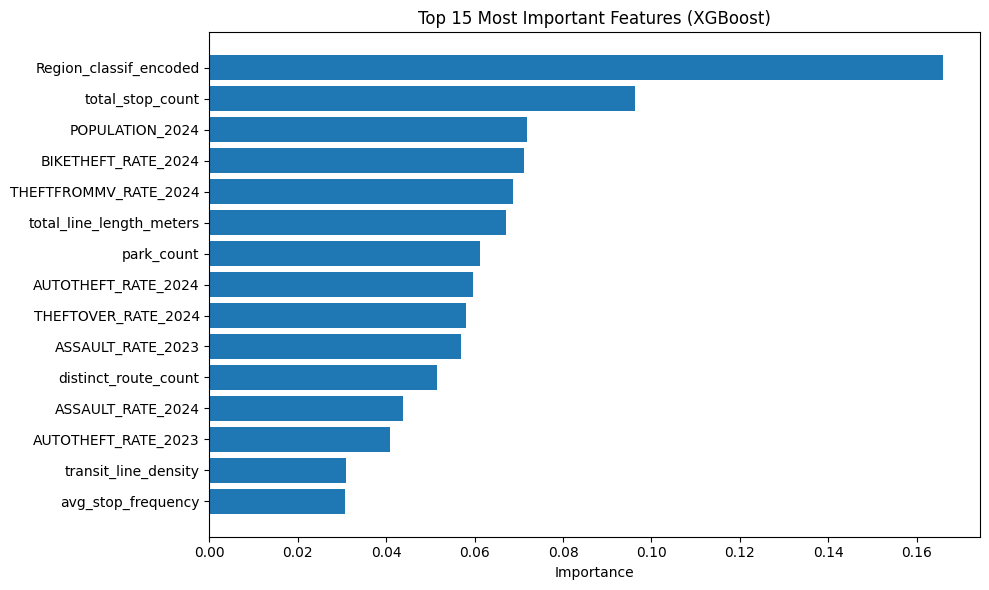


Top 10 Most Important Features:
                 feature  importance
  Region_classif_encoded    0.166006
        total_stop_count    0.096240
         POPULATION_2024    0.071881
     BIKETHEFT_RATE_2024    0.071181
   THEFTFROMMV_RATE_2024    0.068582
total_line_length_meters    0.067078
              park_count    0.061309
     AUTOTHEFT_RATE_2024    0.059569
     THEFTOVER_RATE_2024    0.058107
       ASSAULT_RATE_2023    0.056984


In [18]:
# Step 6: Feature Importance Analysis

import matplotlib.pyplot as plt

# Get feature importances from XGBoost (usually more accurate)
feature_importance = pd.DataFrame({
    'feature': X_processed.columns,
    'importance': xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features (XGBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10).to_string(index=False))


In [19]:
# Step 7: Cross-Validation for Robust Evaluation

from sklearn.model_selection import cross_val_score, KFold

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print("=" * 60)
print("5-FOLD CROSS-VALIDATION")
print("=" * 60)

# Random Forest CV
rf_cv_scores = cross_val_score(rf_model, X_processed, y, 
                                cv=kf, scoring='r2', n_jobs=-1)
rf_cv_mae = -cross_val_score(rf_model, X_processed, y, 
                              cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)

print("\nRandom Forest:")
print(f"  R² scores: {rf_cv_scores}")
print(f"  Mean R²: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std():.4f})")
print(f"  Mean MAE: ${rf_cv_mae.mean():.2f} (+/- ${rf_cv_mae.std():.2f})")

# XGBoost CV
xgb_cv_scores = cross_val_score(xgb_model, X_processed, y, 
                                 cv=kf, scoring='r2', n_jobs=-1)
xgb_cv_mae = -cross_val_score(xgb_model, X_processed, y, 
                               cv=kf, scoring='neg_mean_absolute_error', n_jobs=-1)

print("\nXGBoost:")
print(f"  R² scores: {xgb_cv_scores}")
print(f"  Mean R²: {xgb_cv_scores.mean():.4f} (+/- {xgb_cv_scores.std():.4f})")
print(f"  Mean MAE: ${xgb_cv_mae.mean():.2f} (+/- ${xgb_cv_mae.std():.2f})")

print("\n" + "=" * 60)
if xgb_cv_scores.mean() > rf_cv_scores.mean():
    print("✓ XGBoost performs better on average")
else:
    print("✓ Random Forest performs better on average")


5-FOLD CROSS-VALIDATION

Random Forest:
  R² scores: [0.43896972 0.55909043 0.4154555  0.04994699 0.14120857]
  Mean R²: 0.3209 (+/- 0.1925)
  Mean MAE: $72.95 (+/- $7.74)

XGBoost:
  R² scores: [0.37545562 0.54297173 0.42686272 0.14737171 0.16176939]
  Mean R²: 0.3309 (+/- 0.1539)
  Mean MAE: $73.92 (+/- $7.49)

✓ XGBoost performs better on average


In [21]:
# Summary & Next Steps

print("=" * 60)
print("MODELING SUMMARY")
print("=" * 60)

print(f"""
Dataset Info:
- Total neighborhoods: {len(df)} 
- Valid target samples: {len(df_model)}
- Features used: {len(feature_cols)}
- Target: {target_col}

Key Insights:
1. Used stratified split by Region_classif to ensure balanced train/test
2. Applied conservative hyperparameters to prevent overfitting
3. Cross-validation provides robust performance estimates

Next Steps:
1. Try other targets (bachelor, 2-bed, 3-bed rates)
2. Experiment with feature engineering (e.g., composite safety score)
3. Try ensemble methods (stacking RF + XGBoost)
4. Hyperparameter tuning with GridSearchCV/RandomizedSearchCV
5. Add temporal data if available to increase sample size
6. Consider removing less important features to reduce overfitting
""")

print("=" * 60)


MODELING SUMMARY

Dataset Info:
- Total neighborhoods: 158 
- Valid target samples: 158
- Features used: 16
- Target: 1_bed_room_avg_lease_rate

Key Insights:
1. Used stratified split by Region_classif to ensure balanced train/test
2. Applied conservative hyperparameters to prevent overfitting
3. Cross-validation provides robust performance estimates

Next Steps:
1. Try other targets (bachelor, 2-bed, 3-bed rates)
2. Experiment with feature engineering (e.g., composite safety score)
3. Try ensemble methods (stacking RF + XGBoost)
4. Hyperparameter tuning with GridSearchCV/RandomizedSearchCV
5. Add temporal data if available to increase sample size
6. Consider removing less important features to reduce overfitting



In [9]:
columns_to_keep = [
    # Identifiers
    'AREA_NAME',
    'Region_classif',
    
    # Target Variables (Rental Rates)
    'bachelor_avg_lease_rate',
    '1_bed_room_avg_lease_rate',
    '2_bedrooms_avg_lease_rate',
    '3_bedrooms_avg_lease_rate',
    
    # Area Characteristics
    'area_sq_meters',
    'park_count',
    'POPULATION_2024',
    
    # Transit Access
    'total_stop_count',
    'avg_stop_frequency',
    'transit_line_density',
    'distinct_route_count',
    'total_line_length_meters',
    
    # Safety Metrics (2024 only - most recent)
    'ASSAULT_RATE_2024',
    'AUTOTHEFT_RATE_2024',
    'BIKETHEFT_RATE_2024',
    'THEFTFROMMV_RATE_2024',
    'THEFTOVER_RATE_2024',
    
    # Optional: 2023 for trend analysis
    'ASSAULT_RATE_2023',
    'AUTOTHEFT_RATE_2023',
]

df = df[columns_to_keep]
print(df)

                             AREA_NAME Region_classif  \
0             Keelesdale-Eglinton West    Toronto W03   
1    Bridle Path-Sunnybrook-York Mills    Toronto C12   
2                Birchcliffe-Cliffside    Toronto E06   
3                         Clanton Park    Toronto C06   
4                        North Toronto    Toronto C04   
..                                 ...            ...   
153                Clairlea-Birchmount    Toronto E04   
154                         Cliffcrest    Toronto E08   
155                    Agincourt North    Toronto E07   
156                      Bendale South    Toronto E09   
157           Oakdale-Beverley Heights    Toronto W05   

     bachelor_avg_lease_rate  1_bed_room_avg_lease_rate  \
0                       1675                       2120   
1                          0                       2770   
2                          0                       2165   
3                       1800                       2127   
4                   